1. 직업분석
* 데이터사이언스 분야 선택 이유 -> 파이차트
* 직업 가치관 -> 레이더 차트
* 다른 방향 ->
* 의사결정, 성장 분석
2. 내가 잘하는 것, 잘하고 싶은 것
* 강점 -> 프로젝트 연계 표 (어떤 프로젝트에서 사용됐는지 )
* 강/단점 -> 워드 클라우드
3. 성격분석
* MBTI / DISC / BIG FIVE 검사표 ->
텍스트 비교 알고리즘, 내 진짜 성격 뽑기
4. 집중력 분석
*
* 멀티태스킹
* 꾸준함
5. 기타
* 취미
* 패션
* 음악
* 운동

# 개요
지피지기 백전백승[ 知彼知己 百戰百勝 ]

" 상대를 알고 나를 알면 백 번 싸워도 위태롭지 않다."

회사가 나에 대해 알려면 나 자신부터 내가 어떤 사람인지 알아야 한다는 취지에서 이런 분석을 진행했다.

궁극적으로는, 스스로에 대한 고찰을 통한 나의 의외성과 성장 가능성을 찾아가는 것이다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
! rm ~/.cache/matplotlib -rf
!pip install squarify
!pip install konlpy

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import math
import squarify
import re
import numpy as np
import pandas as pd

from math import pi
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer, util
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture
import umap
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 직업분석

## 왜 데이터 사이언스 분야??
여러가지 이유가 있다.
1. 코딩이 어렵다. 정확히는 직업으로 삼기에는 코딩 자체가 힘들 것 같다. 컴퓨터공학 전공의 장점을 살리기 위해 여러가지를 배우다 보니 데이터 부분이 나와 맞았다고 생각해서 정했다.
2. 나의 성격과 잘 맞다. 지금 이런 분석을 하는 것과 더불어 평소에 분석/정리적인 성격을 가지고 있기 때문에 데이터 분석/엔지니어쪽과 맞다고 생각한다.
3. 업무 자체가 마음에 듬. 아무 의미없는 데이터들에게 의미를 부여하고 거기서 인사이트를 찾는 과정이 매우 흥미롭다.

Text(0.5, 1.0, '데이터 사이언스 분야 선택 이유')

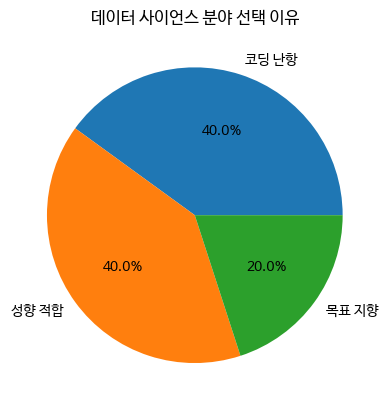

In [ ]:
data_sciencetist_reason = ['코딩 난항', '성향 적합', '목표 지향']
reason_values = [4,4,2]

#** 데이터 사이언스 분야 선택 이유
plt.pie(reason_values, labels=data_sciencetist_reason, autopct='%1.1f%%')
plt.title('데이터 사이언스 분야 선택 이유')

## 직업 가치관
내가 바라는 직장을 다닐 때 고려할 사항들을 정리해봤다.

1. 연봉
* 25년 - 아직 카르페디엠적 성격이 강해 투자, 저축에 대한 긴박함이 없다. 부족하지만 않으면 될 듯 하다.
2. 동료
* 25년 - 어느 정도 융통성을 가져야 한다고 생각한다.
3. 회사가치
* 25년 - 가치가 있으면 주축에 끼도록 하고 없으면 내가 끌어가야겠다
4. 출퇴근
* 25년 - 오히려 가까우면 지각을 더 많이 할 듯.
5. 워라밸
* 25년 - 쉬는 날 쉬고 일하는 날 일하는게 중요하다고 생각
6. 안정성
* 25년 - 한 직장 오래 다니고 싶은 게 있긴 하다.
7. 적합성
* 25년 - 어찌저찌 적응하지 않을까
8. 성장
* 25년 - 안정성과 같이 오래 다니면 진급을 해야하고 진급하려면 필요하다고 생각

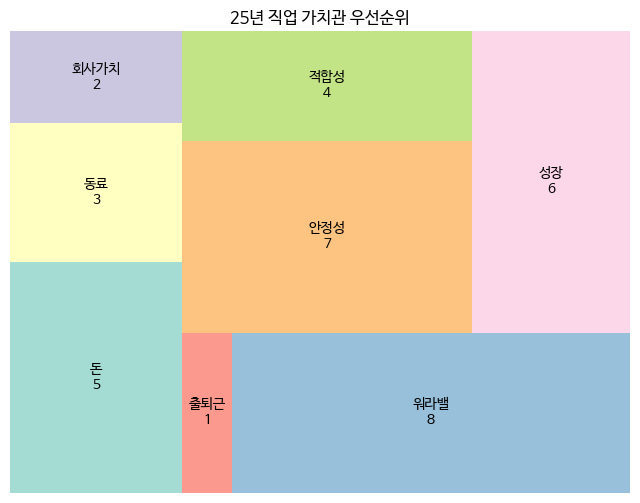

<ipython-input-3-4cd828b5798a>:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_palette = plt.cm.get_cmap("Set1", len(df.index))
<ipython-input-3-4cd828b5798a>:47: MatplotlibDeprecationWarning: Passing label as a length 9 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row)


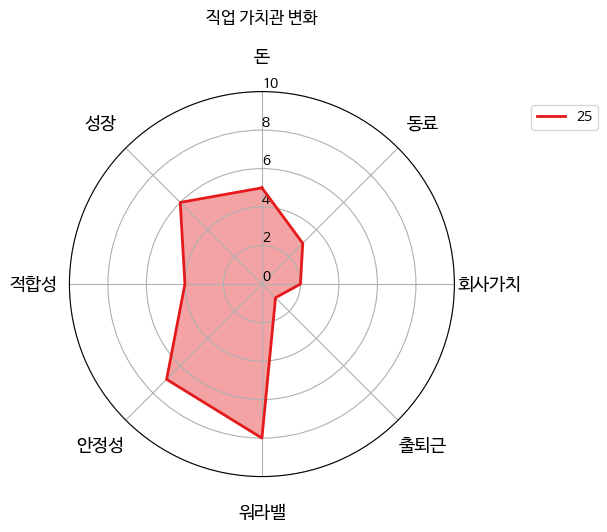

In [ ]:
#** 직업가치관 순위
data_sciencetist_condition = ['년도','돈','동료','회사가치','출퇴근','워라밸','안정성','적합성','성장']
df = pd.DataFrame(columns=data_sciencetist_condition)
#####################년도별 가치관 추가####################
value25 = [25,5,3,2,1,8,7,4,6]
df.loc[len(df)] = value25
# value26 = [26,6,2,1,3,7,8,5,4]
# df.loc[len(df)] = value26
# value27 = [27,1,2,3,5,6,4,8,7]
# df.loc[len(df)] = value27

###########################################################
# 1. 년도별 가치관 순
latest_year = df['년도'].max()
latest_row = df[df['년도'] == latest_year].iloc[0]
latest_values = latest_row.drop('년도')
labels = [f'{k}\n{v}' for k, v in latest_values.items()]
sizes = latest_values.values
plt.figure(figsize=(8, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=plt.cm.Set3.colors)
plt.title(f'{latest_year}년 직업 가치관 우선순위')
plt.axis('off')
plt.show()

# 2. 년도별 가치관 비교
labels = df.columns[1:]
num_labels = len(labels)
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]
my_palette = plt.cm.get_cmap("Set1", len(df.index))
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
legend_list = []
for i, row in df.iterrows():
    legend_list.append(row['년도'])
    color = my_palette(i)
    data = df.iloc[i].drop('년도').tolist()
    data += data[:1]
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], labels, fontsize=13)
    ax.tick_params(axis='x', which='major', pad=15)
    ax.set_rlabel_position(0)
    plt.yticks([0,2,4,6,8,10],['0','2','4','6','8','10'], fontsize=10)
    plt.ylim(0,10)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row)
    ax.fill(angles, data, color=color, alpha=0.4)
# plt.legend(legend_list)
plt.title('직업 가치관 변화',pad=50)
plt.legend(legend_list,loc=(1.2,0.9))
plt.show()

## ChatGPT와의 차별점
현재 간단한 데이터 시장은 AI로 대체되기 때문에 차별되는 나만의 강점이 필요하다.

1. 도메인 지식
* 현재 관심있는 데이터는 유저 행동 데이터고, 추후 금융데이터나 비즈니스데이터까지 확장하고 싶다.
2. 문제 정의 능력
* 데이터들을 통해 어떤 인사이트를 뽑아낼 수 있느냐
3. 윤리적 판단, 직관
* 데이터 신뢰성, 문해력 등 여러 관점들이 있다.
4. 커뮤니케이션

---
몇가지 프로젝트들을 진행하면서 부족한 부분을 채울 예정이다.

( 링크 )

# 성격 분석

## 추구하는 인재상
나는 다양한 상황에서 필요한 역할을 해줄 수 있는 사람이 되고 싶다. 존재 자체로 편안하고 기억에 강하게 남기보다는, 없어도 괜찮지만 있으면 더 좋은 사람으로 기억되기를 바란다

과연 내 성격을 검사했을 때 내가 추구하는 인재상과 맞는지 분석을 하고자 한다.

## 검사
* MBTI
  * ISFP-T (60/60/60/50/80)
    * 창의성을 발휘하고 실질적인 업무를 진행할 수 있는 환경에서 능력을 발휘
    * 아름다움과 실용성을 결합하는데 재능
    * 다양한 방식으로 표현하고 새로운 문제를 처리하는 다양성과 유연성이 높은 커리어가 이상적
    * 자유로운 성격
    * 장기적인 커리어 계획이나 과도하게 체계적인 환경에선 숨막힘
    * 창의적 자유에 대한 욕구와 실질적인 요구 사항 사이에서 균형을 찾아야함
    * 강점 - 창의성, 현실적 문제해결, 적응력 높음, 공감력 높음, 진솔함을 추구하는 성격, 경험을 추구하는 학습자, 높은 감정 인식 능력, 가치 지향적인 탐구자, 곁에서 힘이 되어 주는 성격, 매우 출실한 성격, 진솔한 접근 방식
    * 약점 - 자유로운 성격, 비판에 민감한 성격, 갈등을 피하려는 성격, 단기적인 성격, 완벽주의자, 감정 쉽게 표현하지 못함, 리스크 대응 안함, 개인적 공간에 대한 욕구, 이상주의적인 기대치
* DISC
  * CS유형-신중형
    * 완벽주의자
    * 질을 극도로 중시
    * 예기치 못한 상황 회피를 위해 미리미리 생각하고 계획
    * 의사결정을 내리기 전에 엄청나게 많은 정보를 받아 분석할 수 있는 환경에서 두드러짐
    * 논리와 정확성 요구
    * 가설 점검, 대안 탐색, 최악의 상황 고려
    * 큰 그림을 볼 수 있는 사람들의 도움 필요
    * 긍정적인 에너지를 불어넣어 사기를 진작시키려고 격려의 피드백을 제공하는 사람들과 시너지가 좋음
    * 한계와 바라는 결과가 명확하게 정해진 상황에서 일하기 좋아하지만 몰두해서 끈기있게 어려움을 극복하는 과정도 즐김
    * 표준 운영절차가 부족한 업무환경을 싫어함
    * 갑작스러운 변화를 탐탁지 않게 여기고 무분별한 위험 감수를 싫어함
    * 실수를 두려워 하여 시간만 낭비할 수 있음
    * 정점-일에만 몰두하여 성과를 축하하거나 타인에게 긍정적인 피드백을 안해줌
    * 분석마비증의 위험, 계획을 세우지만 행동하기를 두려워할 수 있음
* Big Five
  * 신경증
    * 자주 또는 쉽게 화를 내지 않음
    * 에너지가 부족하고 활동을 시작하는데 어려움을 겪음
    * 다른 사람들이 자신에 대해 어떻게 생각하는지에 민감
    * 거절과 조롱에 불편함을 느끼고 쉽게 당황하고 부끄러움을 느낌
    * 장기적인 결과보단 단기적인 즐거움과 보상에 중점을 둠
    * 스트레스를 받을 때 더 침착하고 자신감 있으며 명확하게 생각함
  * 외향성
    * 먼저 다가가지 않으며 거리감 있고 신중하게 여겨짐
    * 대규모 군중에 의해 압도되기 때문에 피해다니고 사람들과 함께 있는 걸 싫어하진 않지만 사생활과 혼자만의 시간이 필요
    * 말하기를 좋아하고 지휘를 잡고 지시하는 것을 좋아함(리더형)
    * 느리고 여유있음
    * 소음과 소동에 압도되며 스릴 추구를 싫어함
    * 다양한 긍정적인 감정을 경험함
  * 우호성
    * 공정하고 정직하며 좋은 의도를 가지고 있다고 가정
    * 관계에서 가장 필요로 하는 것이 위선이나 조작이 아니라고 생각해서 솔직하고 정직하며 진실함
    * 남을 돕는 것이 진정으로 자기 서우치의 한 형태로 보람있다고 생각함
    * 대립을 싫어함
    * 다른 사람보다 낫다고 주장하는 것을 좋아하지 않음
    * 인간의 고통에 크게 영향을 받지 않아 공정하고 객관적인 판단을 내림
  * 성실성
    * 자신감은 일을 성취하는데 효과적이지 않고 삶을 통제할 수 없다는 감각을 가짐
    * 조직적이지 않고 산만함
    * 강한 도덕적 의무감을 가짐
    * 개인의 탁월함을 달성하기 위해 적당히 노력함
    * 자주 미루고 잘 따라가지 못하며 매우 완수하고 싶은 일조차도 종종 완료하지 못함
    * 경정을 내릴 때 시간을 들임
  * 경험에 대한 개방성
    * 더 풍부하고 흥미로운 세상을 만듬
    * 예술적 및 자연적인 사건에 대한 평범한관심과 감상
    * 자신의 감정을 잘 인식함
    * 모험심이 높아 새로운 활동이나 경험을 열망함
    * 아이디어보다는 사람이나 사물을 다루는 것을 선호
    * 권위 관습 및 전통적 가치를 도전할 준비가 되어 있음. 적대감, 동정심, 혼란과 무질서를 사랑하는 것으로 나타날 수 있음

### 임시 코드
위에서 진행한 결과들을 통해 나의 최종적인 성격을 탐색하기로 했다.
1. 키워드 추출
* okt(konlpy)
2. 유사도 검사
* TF-IDF + 코사인유사도
* SentenceTransformer(BERT) + 코사인유사도



In [ ]:
mbti_sentences = [
    "창의성을 발휘하고 실질적인 업무를 진행할 수 있는 환경에서 능력을 발휘",
    "아름다움과 실용성을 결합하는데 재능",
    "다양한 방식으로 표현하고 새로운 문제를 처리하는 다양성과 유연성이 높은 커리어가 이상적",
    "자유로운 성격",
    "장기적인 커리어 계획이나 과도하게 체계적인 환경에선 숨막힘",
    "창의적 자유에 대한 욕구와 실질적인 요구사항 사이에서 균형을 찾아야함"
]

disc_sentences = [
    "완벽주의자",
    "질을 극도로 중시",
    "예기치 못한 상황 회피를 위해 미리미리 생각하고 계획",
    "의사결정을 내리기 전에 엄청나게 많은 정보를 받아 분석할 수 있는 환경에서 두드러짐",
    "논리와 정확성 요구",
    "가설 점검, 대안 탐색, 최악의 상황 고려",
    "큰 그림을 볼 수 있는 사람들의 도움 필요",
    "긍정적인 에너지를 불어넣어 사기를 진작시키려고 격려의 피드백을 제공하는 사람들과 시너지가 좋음",
    "한계와 바라는 결과가 명확하게 정해진 상황에서 일하기 좋아하지만 몰두해서 끈기있게 어려움을 극복하는 과정도 즐김",
    "표준 운영절차가 부족한 업무환경을 싫어함",
    "갑작스러운 변화를 탐탁지 않게 여기고 무분별한 위험 감수를 싫어함",
    "실수를 두려워하여 시간만 낭비할 수 있음",
    "일에만 몰두하여 성과를 축하하거나 타인에게 긍정적인 피드백을 안해줌",
    "분석마비증의 위험, 계획을 세우지만 행동하기를 두려워할 수 있음"
]

bigfive_sentences = [
    "자주 또는 쉽게 화를 내지 않음",
    "에너지가 부족하고 활동을 시작하는데 어려움을 겪음",
    "다른 사람들이 자신에 대해 어떻게 생각하는지에 민감",
    "거절과 조롱에 불편함을 느끼고 쉽게 당황하고 부끄러움을 느낌",
    "장기적인 결과보단 단기적인 즐거움과 보상에 중점을 둠",
    "스트레스를 받을 때 더 침착하고 자신감 있으며 명확하게 생각함",
    "먼저 다가가지 않으며 거리감 있고 신중하게 여겨짐",
    "대규모 군중에 의해 압도되기 때문에 피해다니고 사람들과 함께 있는 걸 싫어하진 않지만 사생활과 혼자만의 시간이 필요",
    "말하기를 좋아하고 지휘를 잡고 지시하는 것을 좋아함(리더형)",
    "느리고 여유있음",
    "소음과 소동에 압도되며 스릴 추구를 싫어함",
    "다양한 긍정적인 감정을 경험함",
    "공정하고 정직하며 좋은 의도를 가지고 있다고 가정",
    "관계에서 가장 필요로 하는 것이 위선이나 조작이 아니라고 생각해서 솔직하고 정직하며 진실함",
    "남을 돕는 것이 진정으로 자기 서우치의 한 형태로 보람있다고 생각함",
    "대립을 싫어함",
    "다른 사람보다 낫다고 주장하는 것을 좋아하지 않음",
    "인간의 고통에 크게 영향을 받지 않아 공정하고 객관적인 판단을 내림",
    "자신감은 일을 성취하는데 효과적이지 않고 삶을 통제할 수 없다는 감각을 가짐",
    "조직적이지 않고 산만함",
    "강한 도덕적 의무감을 가짐",
    "개인의 탁월함을 달성하기 위해 적당히 노력함",
    "자주 미루고 잘 따라가지 못하며 매우 완수하고 싶은 일조차도 종종 완료하지 못함",
    "경정을 내릴 때 시간을 들임",
    "더 풍부하고 흥미로운 세상을 만듬",
    "예술적 및 자연적인 사건에 대한 평범한관심과 감상",
    "자신의 감정을 잘 인식함",
    "모험심이 높아 새로운 활동이나 경험을 열망함",
    "아이디어보다는 사람이나 사물을 다루는 것을 선호",
    "권위 관습 및 전통적 가치를 도전할 준비가 되어 있음. 적대감, 동정심, 혼란과 무질서를 사랑하는 것으로 나타날 수 있음"
]

# -----------------------------
# 1️⃣ 키워드 추출 (단순화 버전)
# -----------------------------
def extract_keywords(sentences):
    keywords = set()
    for sentence in sentences:
        words = sentence.replace(",", "").split()
        for word in words:
            if len(word) > 1:  # 너무 짧은 단어 제외
                keywords.add(word)
    return keywords

mbti_keywords = extract_keywords(mbti_sentences)
disc_keywords = extract_keywords(disc_sentences)
bigfive_keywords = extract_keywords(bigfive_sentences)
# -----------------------------
# 2️⃣ 공통점, 차이점
# -----------------------------
common_keywords = mbti_keywords & disc_keywords & bigfive_keywords
mbti_unique = mbti_keywords - disc_keywords - bigfive_keywords
disc_unique = disc_keywords - bigfive_keywords - mbti_keywords
bigfive_unique = bigfive_keywords - mbti_keywords - disc_keywords

# -----------------------------
# 3️⃣ 결과 출력
# -----------------------------
print("✅ 공통 성격 키워드:")
print(common_keywords)

print("\n✅ MBTI 고유 성격 키워드:")
print(mbti_unique)

print("\n✅ DISC 고유 성격 키워드:")
print(disc_unique)

print("\n✅ BIGFIVE 고유 성격 키워드:")
print(bigfive_unique)

✅ 공통 성격 키워드:
{'있는'}

✅ MBTI 고유 성격 키워드:
{'발휘', '환경에선', '표현하고', '성격', '계획이나', '능력을', '균형을', '찾아야함', '방식으로', '다양성과', '진행할', '자유에', '재능', '높은', '아름다움과', '커리어가', '업무를', '창의적', '자유로운', '요구사항', '이상적', '과도하게', '커리어', '체계적인', '문제를', '숨막힘', '발휘하고', '유연성이', '창의성을', '욕구와', '결합하는데', '처리하는', '사이에서', '실질적인', '실용성을'}

✅ DISC 고유 성격 키워드:
{'탐색', '낭비할', '예기치', '감수를', '제공하는', '극복하는', '실수를', '행동하기를', '질을', '피드백을', '일에만', '의사결정을', '상황에서', '생각하고', '한계와', '두려워하여', '축하하거나', '일하기', '최악의', '결과가', '운영절차가', '두드러짐', '논리와', '에너지를', '좋음', '분석할', '계획을', '무분별한', '극도로', '위험', '사기를', '요구', '미리미리', '여기고', '사람들의', '전에', '변화를', '대안', '정보를', '몰두해서', '불어넣어', '시너지가', '도움', '완벽주의자', '과정도', '점검', '정해진', '않게', '내리기', '성과를', '타인에게', '표준', '즐김', '못한', '계획', '좋아하지만', '상황', '많은', '갑작스러운', '끈기있게', '진작시키려고', '회피를', '탐탁지', '받아', '그림을', '분석마비증의', '부족한', '격려의', '업무환경을', '중시', '정확성', '고려', '가설', '안해줌', '바라는', '엄청나게', '몰두하여', '두려워할', '시간만', '세우지만'}

✅ BIGFIVE 고유 성격 키워드:
{'자주', '돕는', '완료하지', '생각해서', '결과보단', '군중에', '자신감', '지시하는', '의도를', '않아', 

In [ ]:
okt = Okt()

def extract_nouns(sentences):
    keywords = set()
    for sentence in sentences:
        nouns = okt.nouns(sentence)
        keywords.update(nouns)
    return keywords

mbti_nouns = extract_nouns(mbti_sentences)
disc_nouns = extract_nouns(disc_sentences)
bigfive_nouns = extract_nouns(bigfive_sentences)

common_nouns = mbti_nouns & disc_nouns & bigfive_nouns
mbti_unique_nouns = mbti_nouns - disc_nouns - bigfive_nouns
disc_unique_nouns = disc_nouns - bigfive_nouns - mbti_nouns
bigfive_unique_nouns = bigfive_nouns - mbti_nouns - disc_nouns

print("✅ 공통 명사:")
print(common_nouns)

print("\n✅ MBTI 고유 명사:")
print(mbti_unique_nouns)

print("\n✅ DISC 고유 명사:")
print(disc_unique_nouns)

print("\n✅ BIGFIVE 고유 명사:")
print(bigfive_unique_nouns)

✅ 공통 명사:
{'수'}

✅ MBTI 고유 명사:
{'발휘', '성격', '창의성', '과도', '방식', '다양성', '실질', '실용', '유연성', '이상', '자유', '재능', '문제', '능력', '처리', '체계', '결', '균형', '요구사항', '사이', '표현', '창의', '커리어', '욕구', '움', '진행'}

✅ DISC 고유 명사:
{'불어', '탐색', '분석', '타인', '상황', '시너지', '리기', '볼', '극복', '제공', '무분별', '축하', '탁', '전', '끈기', '회피', '한계', '극도', '과정', '여기', '감수', '피드백', '정보', '미리', '도움', '마비', '완벽주의자', '위험', '증', '중시', '요구', '점검', '정해진', '논리', '의사결정', '그림', '진작', '정확성', '고려', '실수', '가설', '질', '거나', '못', '행동', '표준', '절차', '사기', '변화', '대안', '최악', '운영', '성과', '격려', '치'}

✅ BIGFIVE 고유 명사:
{'자주', '인간', '리더', '자신감', '형태', '고통', '경정', '압도', '화', '조롱', '피해', '무질서', '당황', '경험', '완수', '조작', '위선', '서우', '크게', '자연', '정심', '낫다', '달성', '즐거움', '함', '부끄러움', '전통', '중점', '권위', '선호', '더', '가장', '대감', '관습', '대규모', '소음', '진정', '다른', '군중', '통제', '사랑', '주장', '효과', '스릴', '도덕', '객관', '자신', '거절', '먼저', '가짐', '때문', '거리', '준비', '성취', '지시', '적', '가지', '추구', '대해', '걸', '세상', '감상', '여유', '조직', '지휘', '모험심', '대립', '개인', '보람', '내지', '가정', '예술', '감', '아

In [ ]:
# 문장들 준비
all_sentences = mbti_sentences + disc_sentences + bigfive_sentences

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_sentences)

# 유사도 계산
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# 출력 (상위 5개 유사 쌍)
num_sentences = len(all_sentences)
for i in range(num_sentences):
    for j in range(i + 1, num_sentences):
        print(f"{i}-{j} 유사도: {cosine_sim[i][j]:.2f}")

0-1 유사도: 0.00
0-2 유사도: 0.00
0-3 유사도: 0.00
0-4 유사도: 0.00
0-5 유사도: 0.10
0-6 유사도: 0.00
0-7 유사도: 0.00
0-8 유사도: 0.00
0-9 유사도: 0.15
0-10 유사도: 0.00
0-11 유사도: 0.00
0-12 유사도: 0.10
0-13 유사도: 0.00
0-14 유사도: 0.00
0-15 유사도: 0.00
0-16 유사도: 0.00
0-17 유사도: 0.00
0-18 유사도: 0.00
0-19 유사도: 0.00
0-20 유사도: 0.00
0-21 유사도: 0.00
0-22 유사도: 0.00
0-23 유사도: 0.00
0-24 유사도: 0.00
0-25 유사도: 0.00
0-26 유사도: 0.00
0-27 유사도: 0.06
0-28 유사도: 0.00
0-29 유사도: 0.00
0-30 유사도: 0.00
0-31 유사도: 0.00
0-32 유사도: 0.00
0-33 유사도: 0.00
0-34 유사도: 0.00
0-35 유사도: 0.00
0-36 유사도: 0.00
0-37 유사도: 0.00
0-38 유사도: 0.00
0-39 유사도: 0.00
0-40 유사도: 0.00
0-41 유사도: 0.00
0-42 유사도: 0.00
0-43 유사도: 0.00
0-44 유사도: 0.00
0-45 유사도: 0.00
0-46 유사도: 0.00
0-47 유사도: 0.00
0-48 유사도: 0.00
0-49 유사도: 0.00
1-2 유사도: 0.00
1-3 유사도: 0.00
1-4 유사도: 0.00
1-5 유사도: 0.00
1-6 유사도: 0.00
1-7 유사도: 0.00
1-8 유사도: 0.00
1-9 유사도: 0.00
1-10 유사도: 0.00
1-11 유사도: 0.00
1-12 유사도: 0.00
1-13 유사도: 0.00
1-14 유사도: 0.00
1-15 유사도: 0.00
1-16 유사도: 0.00
1-17 유사도: 0.00
1-18 유사도: 0.00
1-19 유사도: 0.00
1-20 유사도: 0.

In [ ]:
# 한국어 지원 모델
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

# 문장 임베딩
embeddings = model.encode(all_sentences, convert_to_tensor=True)

# 유사도 계산
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

# 출력 (상위 5개 유사 쌍)
num_sentences = len(all_sentences)
for i in range(num_sentences):
    for j in range(i + 1, num_sentences):
        score = cosine_scores[i][j].item()
        if score > 0.6:  # 유사도 기준선 (조절 가능)
            print(f"{i}-{j} ({all_sentences[i]} ↔ {all_sentences[j]}): {score:.2f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/336k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/967k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

0-2 (창의성을 발휘하고 실질적인 업무를 진행할 수 있는 환경에서 능력을 발휘 ↔ 다양한 방식으로 표현하고 새로운 문제를 처리하는 다양성과 유연성이 높은 커리어가 이상적): 0.71
2-14 (다양한 방식으로 표현하고 새로운 문제를 처리하는 다양성과 유연성이 높은 커리어가 이상적 ↔ 한계와 바라는 결과가 명확하게 정해진 상황에서 일하기 좋아하지만 몰두해서 끈기있게 어려움을 극복하는 과정도 즐김): 0.63
2-47 (다양한 방식으로 표현하고 새로운 문제를 처리하는 다양성과 유연성이 높은 커리어가 이상적 ↔ 모험심이 높아 새로운 활동이나 경험을 열망함): 0.64
3-46 (자유로운 성격 ↔ 자신의 감정을 잘 인식함): 0.61
13-31 (긍정적인 에너지를 불어넣어 사기를 진작시키려고 격려의 피드백을 제공하는 사람들과 시너지가 좋음 ↔ 다양한 긍정적인 감정을 경험함): 0.63
14-38 (한계와 바라는 결과가 명확하게 정해진 상황에서 일하기 좋아하지만 몰두해서 끈기있게 어려움을 극복하는 과정도 즐김 ↔ 자신감은 일을 성취하는데 효과적이지 않고 삶을 통제할 수 없다는 감각을 가짐): 0.61
14-47 (한계와 바라는 결과가 명확하게 정해진 상황에서 일하기 좋아하지만 몰두해서 끈기있게 어려움을 극복하는 과정도 즐김 ↔ 모험심이 높아 새로운 활동이나 경험을 열망함): 0.61
16-47 (갑작스러운 변화를 탐탁지 않게 여기고 무분별한 위험 감수를 싫어함 ↔ 모험심이 높아 새로운 활동이나 경험을 열망함): 0.63
25-46 (스트레스를 받을 때 더 침착하고 자신감 있으며 명확하게 생각함 ↔ 자신의 감정을 잘 인식함): 0.65
29-39 (느리고 여유있음 ↔ 조직적이지 않고 산만함): 0.62
31-46 (다양한 긍정적인 감정을 경험함 ↔ 자신의 감정을 잘 인식함): 0.71


정확도를 올리기 위해 1.직접 문장 단위로 정리 2. LLM을 사용하거나 3. 다른 임베딩 기법을 이용 으로 다시 정했다.


1. 직접 정리
* 원하는 결과가 안나와서 문장 분리를 통한 모델 정확도를 올리려고 했다.
  * 단순한 접속사(와,과) 분리
== 너무 단순한 분리 알고리즘이라 의미가 없음

In [ ]:
def split_and_rewrite(sentence):
    # 접속사 기반 분리 (기본)
    split_patterns = r'그리고|또는|및|고|며|하지만|,'
    parts = [s.strip() for s in re.split(split_patterns, sentence) if s.strip()]

    # 조합 의미가 있는 문장인지 감지
    # (예: 'A와 B 환경에서 ~' → 조합)
    if '와' in sentence or '과' in sentence:
        combined = sentence.replace('와', '과').replace('및', '과')
        return {'original': sentence, 'combined': combined, 'split_parts': parts}

    return {'original': sentence, 'split_parts': parts}

# 전체 문장 처리
processed_sentences = []

for sentence in all_sentences:
    result = split_and_rewrite(sentence)
    processed_sentences.append(result)

# 출력
for i, item in enumerate(processed_sentences):
    print(f"{i}")
    print(f"원문: {item['original']}")
    if 'combined' in item:
        print(f"조합 의미 재작성: {item['combined']}")
    print(f"분리된 부분들: {item['split_parts']}\n")

0
원문: 창의성을 발휘하고 실질적인 업무를 진행할 수 있는 환경에서 능력을 발휘
분리된 부분들: ['창의성을 발휘하', '실질적인 업무를 진행할 수 있는 환경에서 능력을 발휘']

1
원문: 아름다움과 실용성을 결합하는데 재능
조합 의미 재작성: 아름다움과 실용성을 결합하는데 재능
분리된 부분들: ['아름다움과 실용성을 결합하는데 재능']

2
원문: 다양한 방식으로 표현하고 새로운 문제를 처리하는 다양성과 유연성이 높은 커리어가 이상적
조합 의미 재작성: 다양한 방식으로 표현하고 새로운 문제를 처리하는 다양성과 유연성이 높은 커리어가 이상적
분리된 부분들: ['다양한 방식으로 표현하', '새로운 문제를 처리하는 다양성과 유연성이 높은 커리어가 이상적']

3
원문: 자유로운 성격
분리된 부분들: ['자유로운 성격']

4
원문: 장기적인 커리어 계획이나 과도하게 체계적인 환경에선 숨막힘
조합 의미 재작성: 장기적인 커리어 계획이나 과도하게 체계적인 환경에선 숨막힘
분리된 부분들: ['장기적인 커리어 계획이나 과도하게 체계적인 환경에선 숨막힘']

5
원문: 창의적 자유에 대한 욕구와 실질적인 요구사항 사이에서 균형을 찾아야함
조합 의미 재작성: 창의적 자유에 대한 욕구과 실질적인 요구사항 사이에서 균형을 찾아야함
분리된 부분들: ['창의적 자유에 대한 욕구와 실질적인 요구사항 사이에서 균형을 찾아야함']

6
원문: 완벽주의자
분리된 부분들: ['완벽주의자']

7
원문: 질을 극도로 중시
분리된 부분들: ['질을 극도로 중시']

8
원문: 예기치 못한 상황 회피를 위해 미리미리 생각하고 계획
분리된 부분들: ['예기치 못한 상황 회피를 위해 미리미리 생각하', '계획']

9
원문: 의사결정을 내리기 전에 엄청나게 많은 정보를 받아 분석할 수 있는 환경에서 두드러짐
분리된 부분들: ['의사결정을 내리기 전에 엄청나게 많은 정보를 받아 분석할 수 있는 환경에서 두드러짐']

10
원문: 논리와 정확성 요구
조합 의미 재작성: 논리과 정확성 요구
분리된 부

In [ ]:
def rewrite_combination(sentence):
    # 패턴 감지: ~와 ~, ~과 ~ (A와 B)
    match = re.search(r'(\w+)(와|과)(\w+)(.*)', sentence)
    if match:
        part1 = match.group(1).strip()
        part2 = match.group(3).strip()
        rest = match.group(4).strip()

        # 조합 의미로 재작성
        rewritten = f"{part1}와 {part2}가 모두 {rest}함"
        return rewritten
    else:
        return sentence  # 조합 없으면 원문 유지

# 처리
for s in all_sentences:
    rewritten = rewrite_combination(s)
    print(f"원문: {s}")
    print(f"재작성: {rewritten}")
    print("-" * 40)

원문: 창의성을 발휘하고 실질적인 업무를 진행할 수 있는 환경에서 능력을 발휘
재작성: 창의성을 발휘하고 실질적인 업무를 진행할 수 있는 환경에서 능력을 발휘
----------------------------------------
원문: 아름다움과 실용성을 결합하는데 재능
재작성: 아름다움과 실용성을 결합하는데 재능
----------------------------------------
원문: 다양한 방식으로 표현하고 새로운 문제를 처리하는 다양성과 유연성이 높은 커리어가 이상적
재작성: 다양한 방식으로 표현하고 새로운 문제를 처리하는 다양성과 유연성이 높은 커리어가 이상적
----------------------------------------
원문: 자유로운 성격
재작성: 자유로운 성격
----------------------------------------
원문: 장기적인 커리어 계획이나 과도하게 체계적인 환경에선 숨막힘
재작성: 장기적인 커리어 계획이나 과도하게 체계적인 환경에선 숨막힘
----------------------------------------
원문: 창의적 자유에 대한 욕구와 실질적인 요구사항 사이에서 균형을 찾아야함
재작성: 창의적 자유에 대한 욕구와 실질적인 요구사항 사이에서 균형을 찾아야함
----------------------------------------
원문: 완벽주의자
재작성: 완벽주의자
----------------------------------------
원문: 질을 극도로 중시
재작성: 질을 극도로 중시
----------------------------------------
원문: 예기치 못한 상황 회피를 위해 미리미리 생각하고 계획
재작성: 예기치 못한 상황 회피를 위해 미리미리 생각하고 계획
----------------------------------------
원문: 의사결정을 내리기 전에 엄청나게 많은 정보를 받아 분석할 수 있는 환경에서 두드러짐
재작성: 의사결정을 내리기 전에 엄청나게 많은 정보를

2. ChatGPT를 통해 얻은 결과는 "/content/drive/MyDrive/자기분석/src/성격/성격 정리.txt"에 정리했다.


In [ ]:
file_path = '/content/drive/MyDrive/자기분석/src/성격/성격 정리.txt'
with open(file_path, 'r', encoding='utf8') as inFile:
  lines = inFile.readlines()
for line in lines:
  print(line)

✅ 성격 요약 정리 (문장별 근거 포함)

🌟 핵심 강점

창의성, 예술적 감각, 아름다움과 실용성을 결합하는 능력

"아름다움과 실용성을 결합하는데 재능"



현실적인 문제 해결력과 적응력

"창의성을 발휘하고 실질적인 업무를 진행할 수 있는 환경에서 능력을 발휘"

"창의적 자유에 대한 욕구와 실질적인 요구 사항 사이에서 균형을 찾아야함"



공감력, 진솔함, 도덕적 의무감

"강점 - 공감력 높음, 진솔함을 추구하는 성격"



경험을 중시하는 학습 태도, 풍부한 감정 인식

"경험을 추구하는 학습자, 높은 감정 인식 능력"



다른 사람을 돕고자 하는 따뜻한 마음

"곁에서 힘이 되어 주는 성격"



모험심과 새로운 활동에 대한 열망

"모험심이 높아 새로운 활동이나 경험을 열망함"



리더십 성향, 지휘 및 지시 능력

"말하기를 좋아하고 지휘를 잡고 지시하는 것을 좋아함(리더형)"



⚙ 업무 스타일 / 일하는 방식

창의성과 실질성을 모두 요구하는 환경에서 최상의 능력 발휘

"창의성을 발휘하고 실질적인 업무를 진행할 수 있는 환경에서 능력을 발휘"



다양성과 유연성이 높은 커리어에 적합

"다양한 방식으로 표현하고 새로운 문제를 처리하는 다양성과 유연성이 높은 커리어가 이상적"



가설 검증, 대안 탐색, 최악의 시나리오 고려 등 신중한 분석형

"가설 점검, 대안 탐색, 최악의 상황 고려"



질과 정확성을 중시하며 완벽주의적 성향

"완벽주의자", "질을 극도로 중시", "논리와 정확성 요구"



한계와 목표가 명확히 설정된 상황에서 몰입과 끈기로 어려움을 극복

"한계와 바라는 결과가 명확하게 정해진 상황에서 일하기 좋아하지만 몰두해서 끈기있게 어려움을 극복하는 과정도 즐김"



표준화되지 않은 절차나 무분별한 위험 감수를 싫어함

"표준 운영절차가 부족한 업무환경을 싫어함", "갑작스러운 변화를 탐탁지 않게 여기고 무분별한 위험 감수를 싫어함"



의사결정 전에 많은 정보를 모으고 분석하는 환경 선호

"의사결정을 

3. TF-IDF 벡터화는 '단어의 빈도와 중요도를 반영하는 방식'이기 때문에 의미적 유사성을 포착하지 못하기 때문에 사전에 학습된 모델(KoSentenceBERT)를 통해 데이터들을 벡터화하고 시각화하여 적절한 클러스터링 기법을 사용하기로 함
* 기본적으로 K-means 클러스터링을 진행했을 때의 결과를 확인했다.
* 데이터는 t-SNE를 통해 시각화를 진행했다. 고른 분포를 갖고 있으므로 밀도기반방법은 피하고 영향을 덜 받는 Agglomerative Clustering, GMM을 진행했다.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.86k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

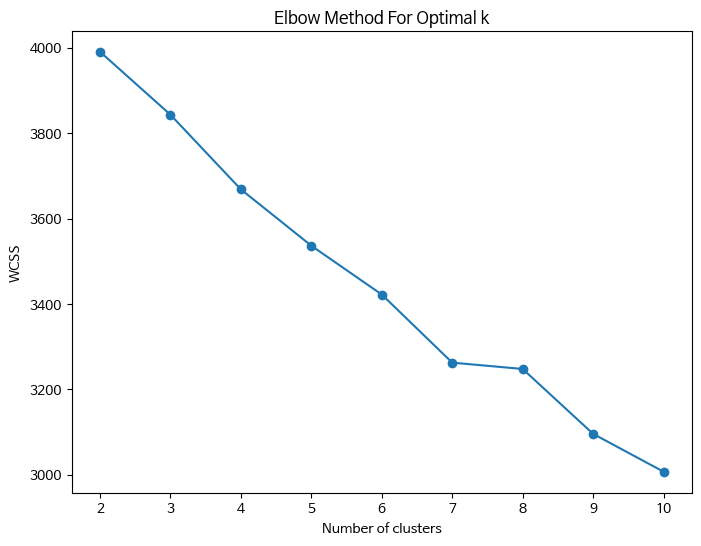

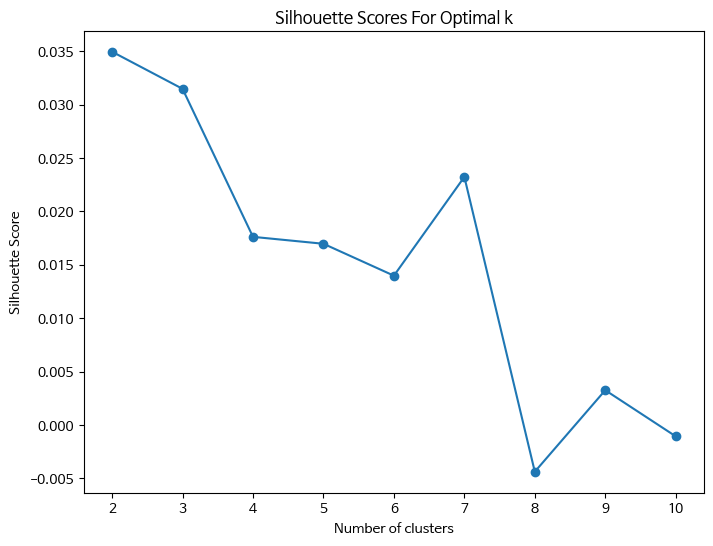

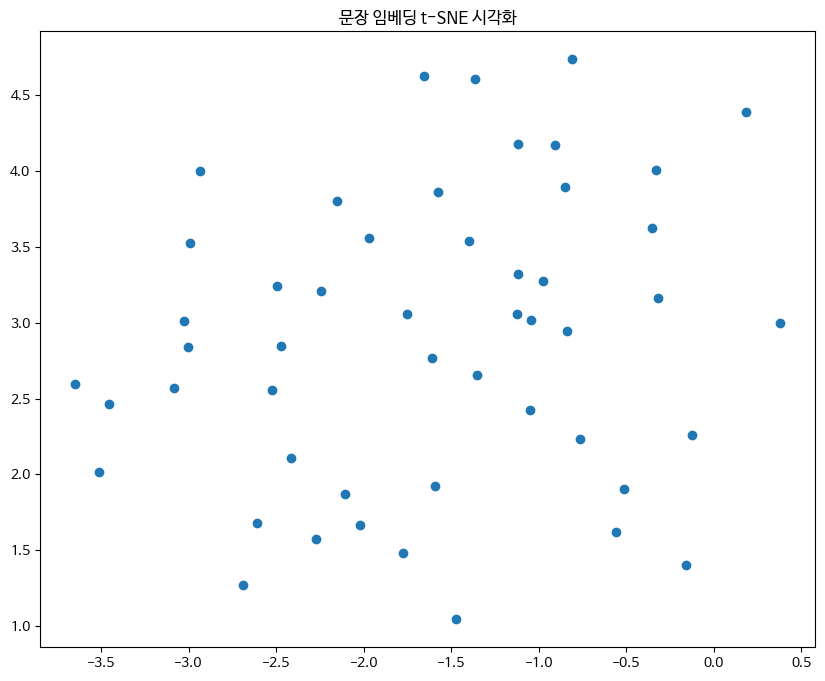

In [ ]:
# 모델 불러오기
model = SentenceTransformer('jhgan/ko-sroberta-multitask')

# 문장 임베딩
embeddings = model.encode(all_sentences)

# 엘보우 방법 (WCSS 계산)
wcss = []
for k in range(2, 11):  # K값 범위 설정 (2 ~ 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)

# 엘보우 차트 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 실루엣 계수 계산 (각 K값에 대해)
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    score = silhouette_score(embeddings, kmeans.labels_)
    silhouette_scores.append(score)

# 실루엣 점수 차트 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# t-SNE로 2D 축소
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

# 각 점에 문장 라벨 달기
# for i, sentence in enumerate(all_sentences):
#     plt.annotate(sentence, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8)

plt.title("문장 임베딩 t-SNE 시각화")
plt.show()

* 두 클러스터링 알고리즘을 진행했을 때 Silhouette Score를 통해 모델 평가를 진행함

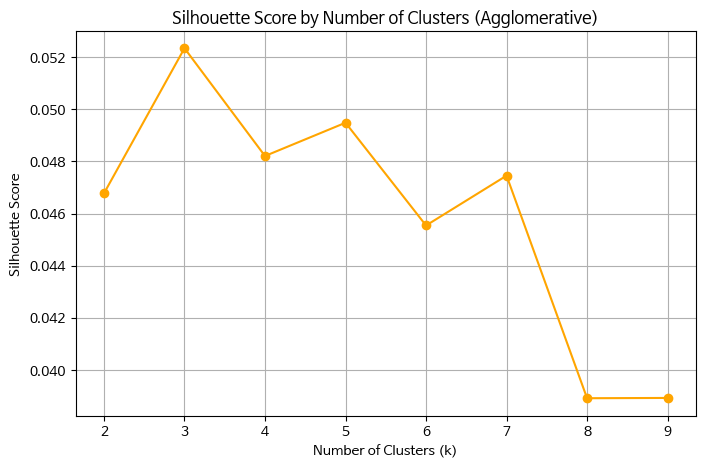

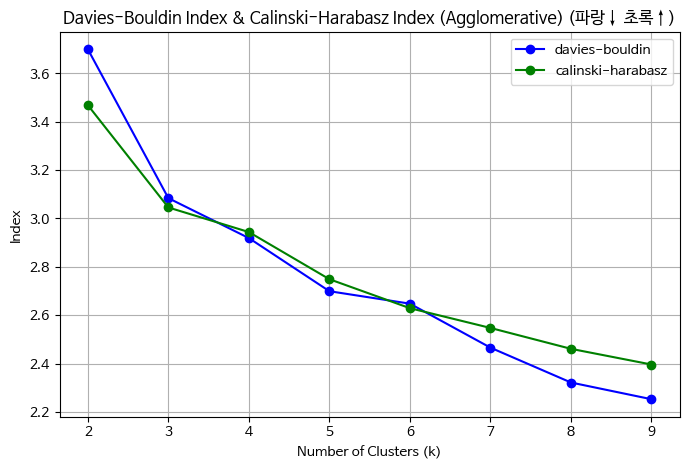

In [ ]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
k_range = range(2,10)

for k in k_range:
  agglo = AgglomerativeClustering(n_clusters=k)
  labels = agglo.fit_predict(embeddings)

  sil_score = silhouette_score(embeddings, labels)
  db_score = davies_bouldin_score(embeddings, labels)
  ch_score = calinski_harabasz_score(embeddings, labels)

  silhouette_scores.append(sil_score)
  davies_bouldin_scores.append(db_score)
  calinski_harabasz_scores.append(ch_score)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Clusters (Agglomerative)')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 5))
plt.plot(k_range, davies_bouldin_scores, marker='o', color='blue', label='davies-bouldin')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Index')
# plt.title('Davies-Bouldin Index by Number of Clusters (Agglomerative) (낮을수록)')
# plt.grid(True)
# plt.show()
# plt.figure(figsize=(8, 5))
plt.plot(k_range, calinski_harabasz_scores, marker='o', color='green', label='calinski-harabasz')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Calinski-Harabasz Index')
plt.title('Davies-Bouldin Index & Calinski-Harabasz Index (Agglomerative) (파랑↓ 초록↑)')
plt.legend()
plt.grid(True)
plt.show()

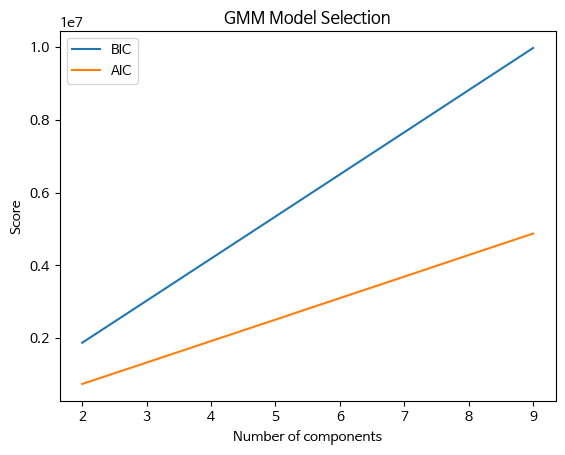

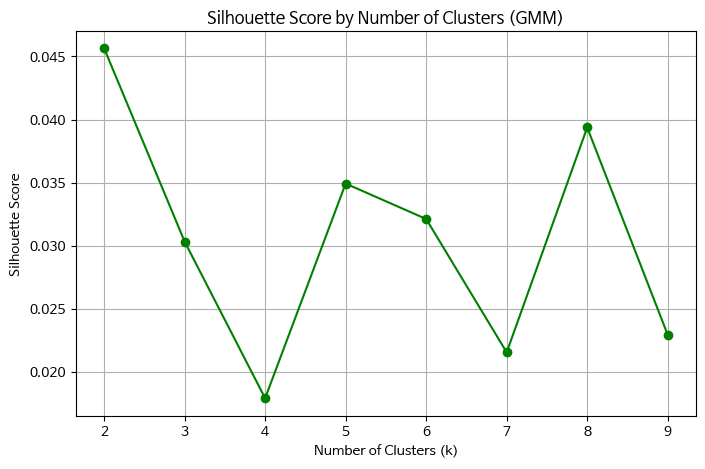

In [ ]:

bic_scores = []
aic_scores = []
silhouette_scores = []
n_components_range = range(2, 10)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(embeddings)
    bic_scores.append(gmm.bic(embeddings))
    aic_scores.append(gmm.aic(embeddings))
    labels = gmm.predict(embeddings)
    silhouette_scores.append(silhouette_score(embeddings, labels))

# Plot BIC & AIC

plt.plot(n_components_range, bic_scores, label='BIC')
plt.plot(n_components_range, aic_scores, label='AIC')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.title('GMM Model Selection')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(n_components_range, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Clusters (GMM)')
plt.grid(True)
plt.show()

* 둘다 매우 의미없는 값(낮은 실루엣 점수)이 나왔으므로 차원 축소를 통한 잠재적인 패턴 파악

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


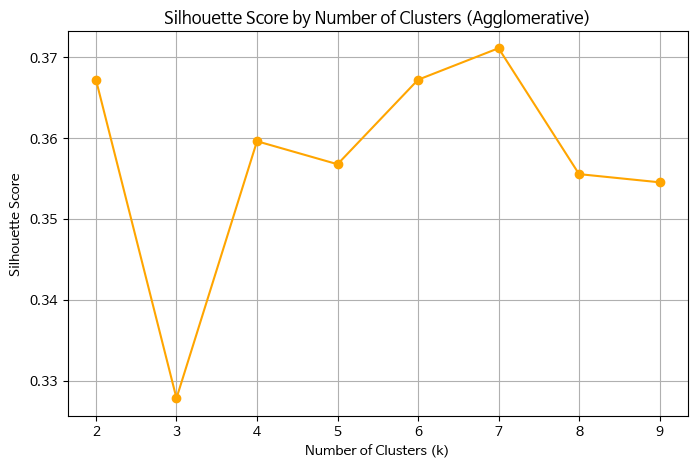

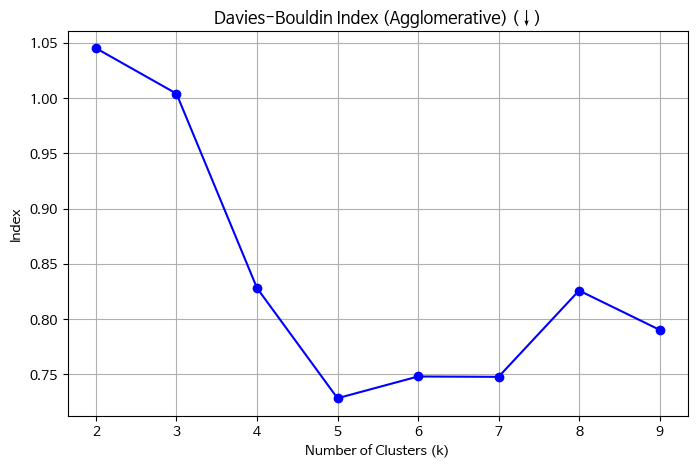

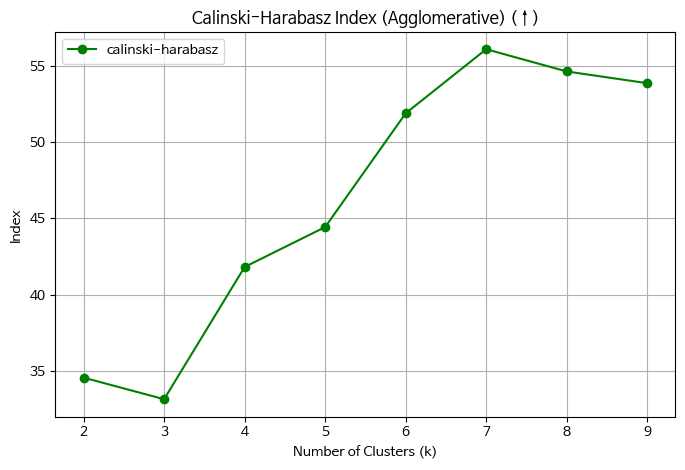

In [ ]:


# 1️⃣ UMAP으로 2차원 축소
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(embeddings)  # embeddings는 KoSentenceBERT로 얻은 벡터


# 2️⃣ Agglomerative Clustering
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
k_range = range(2,10)

for k in k_range:
  agglo = AgglomerativeClustering(n_clusters=k)
  labels = agglo.fit_predict(X_umap)

  sil_score = silhouette_score(X_umap, labels)
  db_score = davies_bouldin_score(X_umap, labels)
  ch_score = calinski_harabasz_score(X_umap, labels)

  silhouette_scores.append(sil_score)
  davies_bouldin_scores.append(db_score)
  calinski_harabasz_scores.append(ch_score)

# 4️⃣ 시각화
# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Clusters (Agglomerative)')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 5))
plt.plot(k_range, davies_bouldin_scores, marker='o', color='blue', label='davies-bouldin')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Index')
plt.title('Davies-Bouldin Index (Agglomerative) (↓)')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 5))
plt.plot(k_range, calinski_harabasz_scores, marker='o', color='green', label='calinski-harabasz')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Index')
plt.title('Calinski-Harabasz Index (Agglomerative) (↑)')
plt.legend()
plt.grid(True)
plt.show()

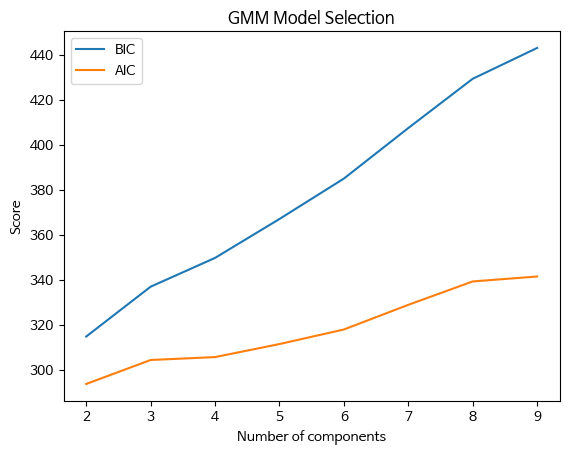

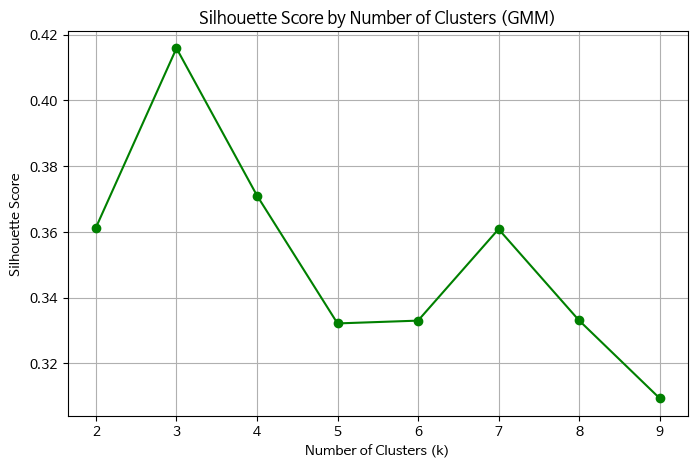

In [ ]:

bic_scores = []
aic_scores = []
silhouette_scores = []
n_components_range = range(2, 10)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(X_umap)
    bic_scores.append(gmm.bic(X_umap))
    aic_scores.append(gmm.aic(X_umap))
    labels = gmm.predict(X_umap)
    silhouette_scores.append(silhouette_score(X_umap, labels))

# Plot BIC & AIC

plt.plot(n_components_range, bic_scores, label='BIC')
plt.plot(n_components_range, aic_scores, label='AIC')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.title('GMM Model Selection')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(n_components_range, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Clusters (GMM)')
plt.grid(True)
plt.show()

* 차원 축소를 더 진행하면 데이터의 의미를 잃게 되므로 1번만 축소한 상황에서 클러스터링을 재진행
* 그래프상 적절한 k값은 7로 판단

In [ ]:
n = 7
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=n)
agglo_labels = agglo.fit_predict(X_umap)
agglo_labels.sort()

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=n, random_state=42)
gmm_labels = gmm.fit_predict(X_umap)
gmm_labels.sort()

# 클러스터별로 문장 모으기
def print_clusters(labels, model_name):
    clusters = defaultdict(list)
    for sentence, label in zip(all_sentences, labels):
        clusters[label].append(sentence)

    print(f"\n=== {model_name} 결과 ===")
    for cluster_id, cluster_sentences in clusters.items():
        print(f"\n📍 Cluster {cluster_id}:")
        for s in cluster_sentences:
            print(f" - {s}")
    return clusters

# 출력
agglo_c = print_clusters(agglo_labels, "Agglomerative Clustering")
gmm_c = print_clusters(gmm_labels, "Gaussian Mixture Model")


=== Agglomerative Clustering 결과 ===

📍 Cluster 0:
 - 창의성을 발휘하고 실질적인 업무를 진행할 수 있는 환경에서 능력을 발휘
 - 아름다움과 실용성을 결합하는데 재능
 - 다양한 방식으로 표현하고 새로운 문제를 처리하는 다양성과 유연성이 높은 커리어가 이상적
 - 자유로운 성격
 - 장기적인 커리어 계획이나 과도하게 체계적인 환경에선 숨막힘
 - 창의적 자유에 대한 욕구와 실질적인 요구사항 사이에서 균형을 찾아야함
 - 완벽주의자
 - 질을 극도로 중시
 - 예기치 못한 상황 회피를 위해 미리미리 생각하고 계획

📍 Cluster 1:
 - 의사결정을 내리기 전에 엄청나게 많은 정보를 받아 분석할 수 있는 환경에서 두드러짐
 - 논리와 정확성 요구
 - 가설 점검, 대안 탐색, 최악의 상황 고려
 - 큰 그림을 볼 수 있는 사람들의 도움 필요
 - 긍정적인 에너지를 불어넣어 사기를 진작시키려고 격려의 피드백을 제공하는 사람들과 시너지가 좋음
 - 한계와 바라는 결과가 명확하게 정해진 상황에서 일하기 좋아하지만 몰두해서 끈기있게 어려움을 극복하는 과정도 즐김
 - 표준 운영절차가 부족한 업무환경을 싫어함
 - 갑작스러운 변화를 탐탁지 않게 여기고 무분별한 위험 감수를 싫어함

📍 Cluster 2:
 - 실수를 두려워하여 시간만 낭비할 수 있음
 - 일에만 몰두하여 성과를 축하하거나 타인에게 긍정적인 피드백을 안해줌
 - 분석마비증의 위험, 계획을 세우지만 행동하기를 두려워할 수 있음
 - 자주 또는 쉽게 화를 내지 않음
 - 에너지가 부족하고 활동을 시작하는데 어려움을 겪음
 - 다른 사람들이 자신에 대해 어떻게 생각하는지에 민감
 - 거절과 조롱에 불편함을 느끼고 쉽게 당황하고 부끄러움을 느낌
 - 장기적인 결과보단 단기적인 즐거움과 보상에 중점을 둠
 - 스트레스를 받을 때 더 침착하고 자신감 있으며 명확하게 생각함

📍 Cluster 3:
 - 먼저 다가가지 않으며 거리감 있고 신중하게 여겨짐
 - 대규모 군중에

* 결과로 나온 클러스터들에 대해 프로젝트에서 적용됐던 성격들을 보자

In [ ]:
def analyze_clusters_with_representatives(sentence_embeddings, labels, sentences):
    df = pd.DataFrame({
        'sentence': sentences,
        'cluster': labels,
        'embedding': list(sentence_embeddings)
    })

    results = {}

    for cluster_id in sorted(set(labels)):
        cluster_df = df[df['cluster'] == cluster_id]
        cluster_vecs = np.vstack(cluster_df['embedding'].values)

        # 클러스터 중심 벡터
        centroid = cluster_vecs.mean(axis=0)

        # 각 문장과 중심의 유사도
        sims_to_centroid = cosine_similarity(cluster_vecs, centroid.reshape(1, -1)).flatten()
        rep_idx = sims_to_centroid.argmax()
        representative_sentence = cluster_df.iloc[rep_idx]['sentence']

        # 클러스터 내 전체 문장과 대표 문장의 유사도
        rep_vector = cluster_vecs[rep_idx]
        sims_within_cluster = cosine_similarity(cluster_vecs, rep_vector.reshape(1, -1)).flatten()

        # 평균 유사도 (대표성 점수)
        avg_similarity = sims_within_cluster.mean()

        # 유사도 순 정렬
        sorted_indices = np.argsort(-sims_within_cluster)
        sorted_sentences = cluster_df.iloc[sorted_indices]['sentence'].tolist()
        sorted_scores = sims_within_cluster[sorted_indices]

        results[cluster_id] = {
            'representative_sentence': representative_sentence,
            'representative_score': avg_similarity,
            'sorted_sentences': list(zip(sorted_sentences, sorted_scores))
        }

    return results

rep_sentences_agglo = analyze_clusters_with_representatives(embeddings, agglo_labels, all_sentences)
rep_sentences_gmm = analyze_clusters_with_representatives(embeddings, gmm_labels, all_sentences)

print("============Agglomerative Clustering=============")
for cluster_id, data in rep_sentences_agglo.items():
    print(f"🔷 클러스터 {cluster_id}")
    print(f"대표 문장: {data['representative_sentence']}")
    print(f"대표성 점수 (평균 유사도): {data['representative_score']:.4f}")
    print("📋 클러스터 내 유사도 순 문장:")
    for sent, score in data['sorted_sentences']:
        print(f" - ({score:.4f}) {sent}")

print("\n============GMM Clustering=============")
for cluster_id, data in rep_sentences_gmm.items():
    print(f"\n🔷 클러스터 {cluster_id}")
    print(f"대표 문장: {data['representative_sentence']}")
    print(f"대표성 점수 (평균 유사도): {data['representative_score']:.4f}")
    print("📋 클러스터 내 유사도 순 문장:")
    for sent, score in data['sorted_sentences']:
        print(f" - ({score:.4f}) {sent}")

============Agglomerative Clustering=============
🔷 클러스터 0
대표 문장: 창의성을 발휘하고 실질적인 업무를 진행할 수 있는 환경에서 능력을 발휘
대표성 점수 (평균 유사도): 0.4974
📋 클러스터 내 유사도 순 문장:
 - (1.0000) 창의성을 발휘하고 실질적인 업무를 진행할 수 있는 환경에서 능력을 발휘
 - (0.6789) 다양한 방식으로 표현하고 새로운 문제를 처리하는 다양성과 유연성이 높은 커리어가 이상적
 - (0.6186) 창의적 자유에 대한 욕구와 실질적인 요구사항 사이에서 균형을 찾아야함
 - (0.4491) 아름다움과 실용성을 결합하는데 재능
 - (0.4488) 자유로운 성격
 - (0.4058) 장기적인 커리어 계획이나 과도하게 체계적인 환경에선 숨막힘
 - (0.3893) 예기치 못한 상황 회피를 위해 미리미리 생각하고 계획
 - (0.2768) 질을 극도로 중시
 - (0.2093) 완벽주의자
🔷 클러스터 1
대표 문장: 의사결정을 내리기 전에 엄청나게 많은 정보를 받아 분석할 수 있는 환경에서 두드러짐
대표성 점수 (평균 유사도): 0.4129
📋 클러스터 내 유사도 순 문장:
 - (1.0000) 의사결정을 내리기 전에 엄청나게 많은 정보를 받아 분석할 수 있는 환경에서 두드러짐
 - (0.4921) 가설 점검, 대안 탐색, 최악의 상황 고려
 - (0.4217) 한계와 바라는 결과가 명확하게 정해진 상황에서 일하기 좋아하지만 몰두해서 끈기있게 어려움을 극복하는 과정도 즐김
 - (0.3205) 큰 그림을 볼 수 있는 사람들의 도움 필요
 - (0.3147) 갑작스러운 변화를 탐탁지 않게 여기고 무분별한 위험 감수를 싫어함
 - (0.2746) 논리와 정확성 요구
 - (0.2569) 표준 운영절차가 부족한 업무환경을 싫어함
 - (0.2228) 긍정적인 에너지를 불어넣어 사기를 진작시키려고 격려의 피드백을 제공하는 사람들과 시너지가 좋음
🔷 클러스터 2
대표 문장: 거절과 조롱에 

* 두 클러스터링이 공통적으로 나를 나타내는 문장들은
1. 창의성을 발휘하고 실질적인 업무를 진행할 수 있는 환경에서 능력을 발휘
2. 의사결정을 내리기 전에 엄청나게 많은 정보를 받아 분석할 수 있는 환경에서 두드러짐
3. 먼저 다가가지 않으며 거리감 있고 신중하게 여겨짐
4. 관계에서 가장 필요로 하는 것이 위선이나 조작이 아니라고 생각해서 솔직하고 정직하며 진실함
5. 모험심이 높아 새로운 활동이나 경험을 열망함

이고 추가적으로
6. 거절과 조롱에 불편함을 느끼고 쉽게 당황하고 부끄러움을 느낌
7. 갑작스러운 변화를 탐탁지 않게 여기고 무분별한 위험 감수를 싫어함
8. 자주 미루고 잘 따라가지 못하며 매우 완수하고 싶은 일조차도 종종 완료하지 못함
9. 자신감은 일을 성취하는데 효과적이지 않고 삶을 통제할 수 없다는 감각을 가짐


### 성격 클러스터링 완료
이 뒤로는 ChatGPT를 통해 성격을 요약했다.
1. 업무에 관한 성격
* 실용적 창의인
* 깊이 생각하고 실수를 피하려는 성향
* 품질과 신뢰성을 중시
2. 인간관계에 대한 성격
* 깊고 진실된 관계를 지향
* 내면에서 평가와 실패에 대한 부담을 안고 있는 섬세한 사람
3. 가치관에 관한 성격
* 그럼에도 호기심과 모험심으로 인한 경험확장 시도에 대한 열망이 있음

### 성격 개선
하지만
* 진로에 대한 적합성
* 추구하는 인재상에 대한 적합성

을 기준으로 봤을 땐 강단점이 있다.

|장점|단점|
|---|---|
|정직하고 성실|장기적으로는 완수가 어려움|
|생각이 깊음|위험 회피 성향|
|섬세함|조롱이나 평가에 민감|
|제3자 입장에서 중립적 태도|직접적인 관계가 있으면 안된다|
|의견 정리 및 조율|해당 의견들을 어디에 정리했는지를 모름|
|알찬 계획 수립|계획에 대한 실행력, 자신감 부족|

<br>

|개선점|분석|해결|
|---|---|---|
|성격관련|Born to be|여러 경험을 하면서 익숙해지는 수 밖에 없다.|
|매번 중립적인 태도|Born to be|중립적인 것보다 **융통성 있는 것**으로 바꿔보자|
|기억력|다른 툴(카카오톡,메모장)로 정리해두고 <br>매번 다른 곳(핸드폰, 노트북, 데스크탑)에 저장하니까 모른다.|**하나의 툴**에 모든 걸 작성하고 하루의 마무리에 분류하자<br>로그-카카오톡 / 코드-깃허브,구글코랩|
|계획에 대한 실행력, 자신감|너무 여유를 가지는 것 같다.|스스로 **데드라인**을 정하고 급하게 살아보자<br>작지만 많은 **성공경험**을 가져가자|

# 집중력 분석
내가 업무 진행에 있어서 얼마나 집중할 수 있을 지 여러가지 조건을 바탕으로 스스로가 실험체가 되어 분석했다.

이전에 조사한 바로는
* 예열시간 = 1시간
* 유지시간 = 3시간
* 유지일 = 3일
* 재집중시간 = 30분

이었다.

이제는 여러가지 조건을 추가하여 어떤 환경에서도 효과적인 능률을 낼 수 있도록 몸을 프로그래밍할 것이다.

조건들은 다음과 같다.
###1. 취침시간,기상시간,컨디션(1~5)
* 적절한 취침시간을 찾아 컨디션에 따른 능률 향상을 보일 수 있다.

###2. 기상시간,준비시작시간,출발시간
* 세 시간대의 간격을 통한 나태함 측정

###3. 이동시간,이동수단
* 짧은 이동시간이 예열시간(휴식[0])에 영향을 줄까

###4. 식사,도착장소,음료
* 공복이냐 만복이냐 소화가 잘되는 음식을 먹었느냐
* 장소에 따른 집중력 분석
* 카페인의 유무, 추가 디저트 유무

###5. 도착시간
* 측정의 시작

###6. 휴식방법,휴식시간,집중도
* 휴식방법에 따른 휴식시간,집중도 비교

###7. 작업내용,작업시간,집중도
* 작업내용에 따른 작업시간,집중도 비교

###8. 작업종료시간
* 측정의 종료

###9. 이후 스케쥴
* 만약 뒤에 스케쥴이 있을 때 작업 완성도에 영향이 있을 수 도 있다.

  * 스케쥴에 맞추려고 급하게 하느냐 완성도가 떨어지든, 오히려 집중을 열심히 해서 완성도가 높아지든 내 스타일을 확인할 수 있다

In [ ]:
columns = [
    "날짜", "취침시간", "기상시간", "컨디션", "준비시간", "출발시간", "이동시간", "이동수단",
    "식사", "도착장소", "음료", "도착시간", "휴식방법", "휴식시간", "휴식로그",
    "작업내용", "작업시간", "작업로그", "집중도", "작업종료시간", "이후스케쥴"
]

df = pd.DataFrame(columns=columns)

#############데이터 추가##################
value5_9 = ['2025-05-09','5:00','11:07']
df.loc[len(df)] = value5_9

## 꾸준함

# 성장 분석


## 의사결정 분석
년도별 이벤트들을 정리하여 내가 어떤 상황에서 어떤 선택을 하고 어떤 경향이 있는지 알아보자

## 스킬 분석
프로젝트들을 진행하면서 배웠던 스킬들에 대해 분석하여 내 강점을 알아보자
* 스킬, 분야, 마음가짐, 속도, 커뮤니케이션 등의 칼럼을 바탕으로 하자

# **깃업로드**